In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC

from pandas import DataFrame

In [3]:
# Read data in the excel file
df = pd.read_csv('mona.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Get min, max and average of the age
print('Min age: ', min(df['Age']))
print('Max age: ', max(df['Age']))
print('Average age: ', df['Age'].mean())

Min age:  21
Max age:  81
Average age:  33.240885416666664


In [5]:
df = df.drop(df.index[df['Age'] > 30])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
758,1,106,76,0,0,37.5,0.197,26,0
760,2,88,58,26,16,28.4,0.766,22,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [6]:
df = df.drop(df.index[df['Outcome'] == 0])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,3,78,50,32,88,31.0,0.248,26,1
23,9,119,80,35,0,29.0,0.263,29,1
31,3,158,76,36,245,31.6,0.851,28,1
38,2,90,68,42,0,38.2,0.503,27,1
45,0,180,66,39,0,42.0,1.893,25,1
...,...,...,...,...,...,...,...,...,...
731,8,120,86,0,0,28.4,0.259,22,1
732,2,174,88,37,120,44.5,0.646,24,1
746,1,147,94,41,0,49.3,0.358,27,1
750,4,136,70,0,0,31.2,1.182,22,1


In [7]:
df.to_csv(r'g1.csv')

In [8]:
# Read data in the excel file
data = pd.read_csv('g1.csv')
data

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,3,78,50,32,88,31.0,0.248,26,1
1,23,9,119,80,35,0,29.0,0.263,29,1
2,31,3,158,76,36,245,31.6,0.851,28,1
3,38,2,90,68,42,0,38.2,0.503,27,1
4,45,0,180,66,39,0,42.0,1.893,25,1
...,...,...,...,...,...,...,...,...,...,...
85,731,8,120,86,0,0,28.4,0.259,22,1
86,732,2,174,88,37,120,44.5,0.646,24,1
87,746,1,147,94,41,0,49.3,0.358,27,1
88,750,4,136,70,0,0,31.2,1.182,22,1


In [9]:
#print('Max Glucose: ', max(data['Glucose']))

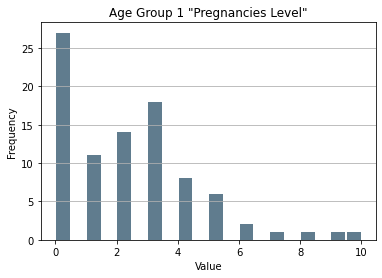

In [12]:
data['Pregnancies'].plot(kind = 'hist', title = 'Glucose', figsize = (6, 4),bins=20, rwidth=0.9, color='#607c8e')

#plt.ylim([0, 30])
plt.title('Age Group 1 "Pregnancies Level"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()

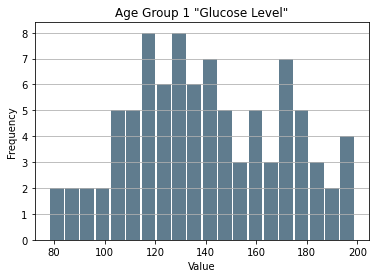

In [13]:
data['Glucose'].plot(kind = 'hist', title = 'Glucose', figsize = (6, 4),bins=20, rwidth=0.9, color='#607c8e')

#plt.ylim([0, 30])
plt.title('Age Group 1 "Glucose Level"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()

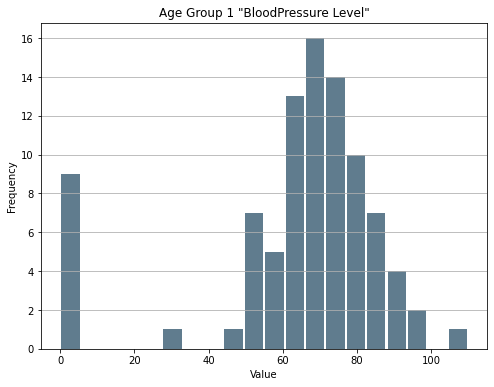

In [10]:
data['BloodPressure'].plot(kind = 'hist', title = 'BloodPressure', figsize = (8, 6),bins=20, rwidth=0.9, color='#607c8e')

#plt.ylim([0, 30])
plt.title('Age Group 1 "BloodPressure Level"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()

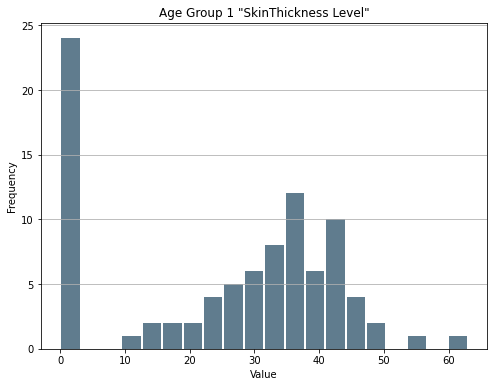

In [11]:
data['SkinThickness'].plot(kind = 'hist', title = 'SkinThickness', figsize = (8, 6),bins=20, rwidth=0.9, color='#607c8e')

#plt.ylim([0, 30])
plt.title('Age Group 1 "SkinThickness Level"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()

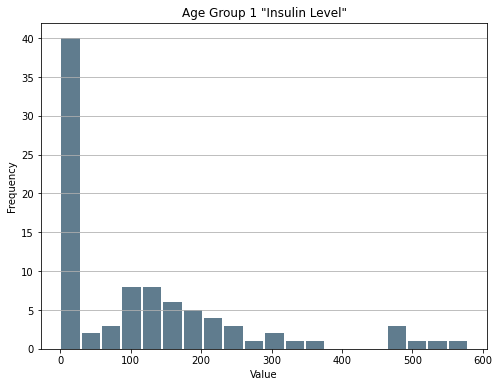

In [12]:
data['Insulin'].plot(kind = 'hist', title = 'Insulin', figsize = (8, 6),bins=20, rwidth=0.9, color='#607c8e')

#plt.ylim([0, 30])
plt.title('Age Group 1 "Insulin Level"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()

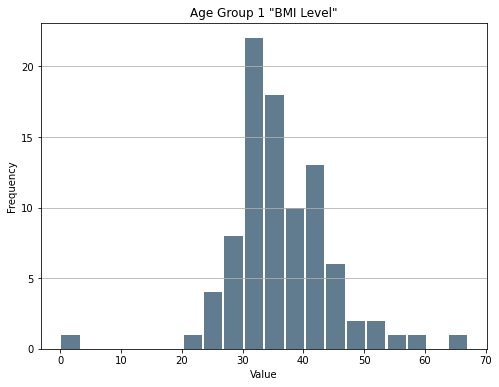

In [13]:
data['BMI'].plot(kind = 'hist', title = 'BMI', figsize = (8, 6),bins=20, rwidth=0.9, color='#607c8e')

#plt.ylim([0, 30])
plt.title('Age Group 1 "BMI Level"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()

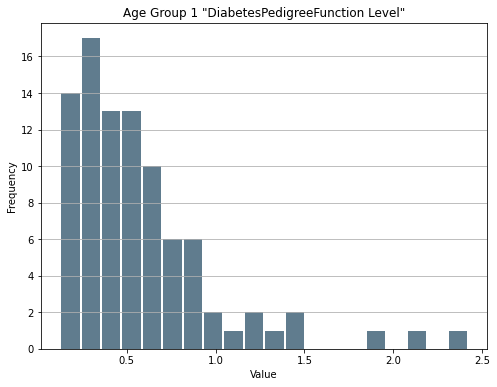

In [14]:
data['DiabetesPedigreeFunction'].plot(kind = 'hist', title = 'DiabetesPedigreeFunction', figsize = (8, 6),bins=20, rwidth=0.9, color='#607c8e')

#plt.ylim([0, 30])
plt.title('Age Group 1 "DiabetesPedigreeFunction Level"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')


plt.show()